# Prediction of car prices
Goal of the project is to create the best model to predict car prices.
Data is based on one of the Polish biggest automotive website, otomoto.pl

In [1]:
# bs4 webscraping, requests get source code, numpy/pandas data management, matplotlib charts
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Example car will be Hyundai i30
BASE_URL = r'https://www.otomoto.pl/osobowe/hyundai/i30/'

"""
Class of car offer with all parameters from the website
"""
class Offer:
    def __init__(self, year:int, mileage:int, fuel_type:str,price:int):
        self.year = year
        self.mileage = mileage
        self.fuel_type = fuel_type
        self.price = price

        
"""
Function checks maximum number of pages with offers
"""
def get_pages_number(url:str):
    html = requests.get(url).text
    main_page = BeautifulSoup(html, 'lxml')
    pages_number = main_page.select('.page')[-1].text
    return int(pages_number)

PAGES_TO_SCRAP = get_pages_number(BASE_URL)
    
"""
Returns list of all offers objects
"""
def get_offers_data(url:str, page_number:int):
    offers_list = []
    for page in range(1,PAGES_TO_SCRAP):
        print(f'Page {page}')
        page_url = url + f'?page={page}'
        print(page_url)
        html = requests.get(page_url).text
        main_page = BeautifulSoup(html, 'lxml')
        offers = main_page.select('.offer-item__content')
        for offer in offers:
            try:
                offer_url = offer.select('.offer-title__link')[0].attrs['href']
                year = int(offer.find('li', {'data-code':'year'}).text.strip())
                mileage = int(offer.find('li', {'data-code':'mileage'}).text.strip()[:-3].replace(" ",""))
                fuel_type = offer.find('li', {'data-code':'fuel_type'}).text.strip()
                price = int(offer.select('.offer-price__number')[0].span.text.strip().replace(" ",""))

                offer_object = Offer(year, mileage, fuel_type, price)
                #print(offer_object.__dict__)
                offers_list.append(offer_object.__dict__)
            except:
                print('collecting data error')
                
    return offers_list

In [3]:
all_offers_list = get_offers_data(BASE_URL, PAGES_TO_SCRAP)

Page 1
https://www.otomoto.pl/osobowe/hyundai/i30/?page=1
Page 2
https://www.otomoto.pl/osobowe/hyundai/i30/?page=2
Page 3
https://www.otomoto.pl/osobowe/hyundai/i30/?page=3
Page 4
https://www.otomoto.pl/osobowe/hyundai/i30/?page=4
Page 5
https://www.otomoto.pl/osobowe/hyundai/i30/?page=5
Page 6
https://www.otomoto.pl/osobowe/hyundai/i30/?page=6
Page 7
https://www.otomoto.pl/osobowe/hyundai/i30/?page=7
Page 8
https://www.otomoto.pl/osobowe/hyundai/i30/?page=8
Page 9
https://www.otomoto.pl/osobowe/hyundai/i30/?page=9
Page 10
https://www.otomoto.pl/osobowe/hyundai/i30/?page=10
Page 11
https://www.otomoto.pl/osobowe/hyundai/i30/?page=11
Page 12
https://www.otomoto.pl/osobowe/hyundai/i30/?page=12
Page 13
https://www.otomoto.pl/osobowe/hyundai/i30/?page=13
Page 14
https://www.otomoto.pl/osobowe/hyundai/i30/?page=14
Page 15
https://www.otomoto.pl/osobowe/hyundai/i30/?page=15
Page 16
https://www.otomoto.pl/osobowe/hyundai/i30/?page=16
Page 17
https://www.otomoto.pl/osobowe/hyundai/i30/?page=1

In [4]:
data = pd.DataFrame(all_offers_list)
data

year  mileage fuel_type  price
0     2013    53337   Benzyna  31000
1     2019    23603   Benzyna  52900
2     2019    40056   Benzyna  51900
3     2019    23390   Benzyna  52900
4     2016   126814    Diesel  32900
...    ...      ...       ...    ...
1785  2011   119000    Diesel  19900
1786  2009   121000   Benzyna  15500
1787  2012   178000    Diesel  25500
1788  2018    28228   Benzyna  51500
1789  2018    14995   Benzyna  52900

[1790 rows x 4 columns]

In [5]:
#to avoid text variables
data = pd.get_dummies(data, columns=['fuel_type'])
data

year  mileage  price  fuel_type_Benzyna  fuel_type_Benzyna+LPG  \
0     2013    53337  31000                  1                      0   
1     2019    23603  52900                  1                      0   
2     2019    40056  51900                  1                      0   
3     2019    23390  52900                  1                      0   
4     2016   126814  32900                  0                      0   
...    ...      ...    ...                ...                    ...   
1785  2011   119000  19900                  0                      0   
1786  2009   121000  15500                  1                      0   
1787  2012   178000  25500                  0                      0   
1788  2018    28228  51500                  1                      0   
1789  2018    14995  52900                  1                      0   

      fuel_type_Diesel  
0                    0  
1                    0  
2                    0  
3                    0  
4                    1  
...                ...  
1785                 1  
1786                 0  
1787                 1  
1788                 0  
1789                 0  

[1790 rows x 6 columns]

In [6]:
data.shape

(1790, 6)

In [7]:
data.describe()

year        mileage          price  fuel_type_Benzyna  \
count  1790.000000    1790.000000    1790.000000        1790.000000   
mean   2013.884916  108408.187709   34692.703352           0.618436   
std       4.003652   75821.654047   19314.599398           0.485906   
min    2007.000000       1.000000    2214.000000           0.000000   
25%    2010.000000   33056.500000   18300.000000           0.000000   
50%    2013.000000  112736.500000   29900.000000           1.000000   
75%    2018.000000  168000.000000   49400.000000           1.000000   
max    2020.000000  425000.000000  144800.000000           1.000000   

       fuel_type_Benzyna+LPG  fuel_type_Diesel  
count            1790.000000       1790.000000  
mean                0.032961          0.348603  
std                 0.178584          0.476661  
min                 0.000000          0.000000  
25%                 0.000000          0.000000  
50%                 0.000000          0.000000  
75%                 0.000000          1.000000  
max                 1.000000          1.000000

In [8]:
X = data.drop(columns='price', axis=1)
y = data.price

# Modelling

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
from warnings import filterwarnings
filterwarnings("ignore")

In [11]:
# split to train and test data
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33)

(<AxesSubplot:>, <AxesSubplot:>)

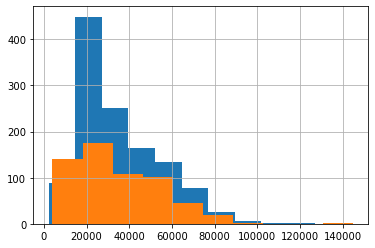

In [12]:
y_train.hist(), y_test.hist()

In [13]:
r2_list = []
rmse_list = []

## LinearRegression

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
print(model.intercept_)
print(model.coef_)

-6997013.554372811
[ 3.49438088e+03 -5.03895856e-02  1.03198774e+03  1.06910602e+03
 -2.10109376e+03]


In [16]:
print('Linear Regression R squared: %.4f' % model.score(X_test, y_test))
r2 = model.score(X_test, y_test)
r2_list.append(r2)

Linear Regression R squared: 0.8224


In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_lr = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f'%rmse_lr)
rmse_list.append(rmse_lr)

RMSE: 8023.45


### LinearRegression with scaling

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", LinearRegression())])

pipe.fit(X_train, y_train)
y_pred_lrscal = pipe.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Linear Regression with scaler R squared: %.4f' % r2_score(y_test, y_pred))
print('RMSE: %.2f'%rmse )
r2_list.append(r2_score(y_test, y_pred))
rmse_list.append(rmse)

Linear Regression with scaler R squared: 0.8224
RMSE: 8023.45


## LogisticRegression

In [19]:
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([("poly", PolynomialFeatures()),
                 ("scaler", StandardScaler()),
                 ("model", LogisticRegression())])

param_grid = {"poly__degree":[1,2],
              "scaler__with_std": [True, False],
              "model__penalty": ["l1","l2"],
              "model__C": [1000, 100, 10, 1, 0.1, 0.01]}

gs = GridSearchCV(pipe, param_grid, cv = 10, n_jobs=-1)

gs.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                             

In [20]:
y_pred = gs.predict(X_test)
r2_score(y_test, y_pred)

0.8461619698291846

In [21]:
gs.best_params_

{'model__C': 1000,
 'model__penalty': 'l2',
 'poly__degree': 1,
 'scaler__with_std': True}

In [22]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f'%rmse )
r2_list.append(r2_score(y_test, y_pred))
rmse_list.append(rmse)

RMSE: 7466.93


## Other models automatized

In [23]:

pipelines = ([Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("model", DecisionTreeClassifier())]),
             Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ('poly', PolynomialFeatures()),
    ("model", Ridge())]),
             Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ('poly', PolynomialFeatures()),
    ("model", Lasso())])
])


param_grids = [{"model__min_samples_leaf": [10,25,50,100],
              "model__max_depth": [None, 10],
               "scaler__with_std": [True, False]},
               
               {"model__alpha":[300,400,500,600],
               "poly__degree":[2,5,10,20,25],
               "scaler__with_std": [True, False]},
               {"model__alpha":[0.01,0.1,1,10,100],
               "poly__degree":[2,5,10,20,25],
               "scaler__with_std": [True, False]}
              ]

for model, grid in zip(pipelines, param_grids):
    gs = GridSearchCV(model, grid, cv=10)
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f' {model} rmse - {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'r2 - {r2_score(y_test, y_pred)}')
    print(gs.best_params_)
    rmse_list.append(rmse)
    r2_list.append(r2)

 Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False) rmse - 7423.132367620028
r2 - 0.8479612161176999
{'model__max_depth': None, 'model__min_samples_leaf': 50, 'scaler__with_std': True}
 Pipeline(memory=None,
         steps=

In [24]:
import pandas as pd
d = {'r2_score': r2_list, 
     'rmse': rmse_list
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LR', 'LR scaler', 'LogisticRegression', 'DecisionTree', 'Ridge', 'Lasso'])
df.sort_values(by=['r2_score'] ,ascending=False)

Method  r2_score         rmse
4               Ridge  0.853962  7275.177244
3        DecisionTree  0.847961  7423.132368
2  LogisticRegression  0.846162  7466.926329
0                  LR  0.822376  8023.453612
1           LR scaler  0.822376  8023.453612
5               Lasso  0.742407  9662.225616

<AxesSubplot:xlabel='Method', ylabel='rmse'>

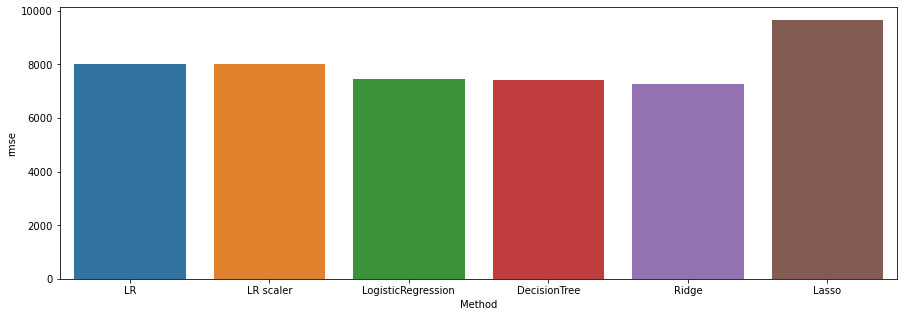

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x='Method', y='rmse', data=df.drop(columns='r2_score'), label='RMSE')

<AxesSubplot:xlabel='Method', ylabel='r2_score'>

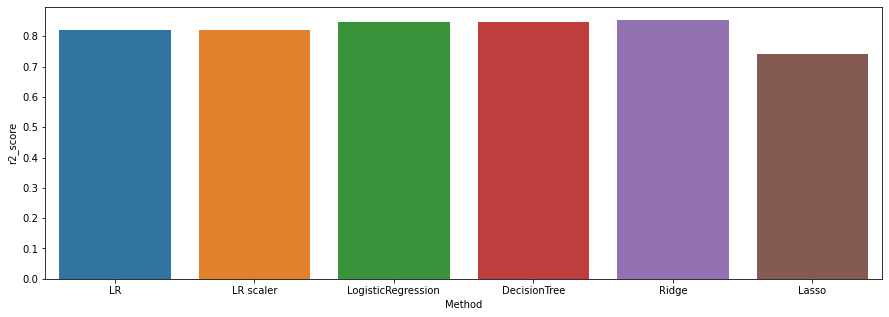

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x='Method', y='r2_score', data=df.drop(columns='rmse'), label='R2')

# Final results
Ridge regression seems to be the most accurate but the differences are not that visible. The worst model was Lasso regression with r2 score 0,74 and RMSE 9662,22